# DCF Cash flow 5Y + terminal with plots plus bar chart and can be ajust to each company requirments plus #
# Levered and unlevered TAX. KPI's and Ratios for Liquidity, Return, Financial & Sensitive
# Date and Scenario based on user selection 
 

Choose the scenario (Best, Base, Worst):  base
Enter the start date (mm/dd/yyyy):  12/31/2022


Please enter the following values based on the selected scenario:
Scenario: Base
Recommended ranges:
Terminal Growth Rate: 0.02 to 0.03
Discount Rate: 0.08 to 0.09
Beta: 1.0 to 1.3


Enter the Beta coefficient:  1
Enter the discount rate:  0.08
Enter the terminal growth rate:  0.02



                              Summary of DCF Analysis (Base Scenario)                               
Terminal Growth Rate: 2.0%
WACC: 5.2%
Discount Rate: 8.0%
Beta: 1.00
Stock Number: 1,000,000
Inflation Rate (Average): 3.6%
Total Working Capital (Final Year): $1,800,641.0
Current Tax (Unlevered): $1,220,277.6
Current Tax (Levered): $1,118,339.8
EPS (Earnings Per Share): $27.55
----------------------------------------------------------------------------------------------------
Return on Sales (ROS) for each year:
Year 12/31/2022: 18.02%
Year 12/31/2023: 20.49%
Year 12/31/2024: 18.52%
Year 12/31/2025: 22.67%
Year 12/31/2026: 21.81%
----------------------------------------------------------------------------------------------------
Detailed Financial Summary:
        Year               Revenue            Gross Profit       Gross Margin (%)          EBITDA                EBIT          Interest Expenses           EBT               Net Income              Debt           Working Capital   


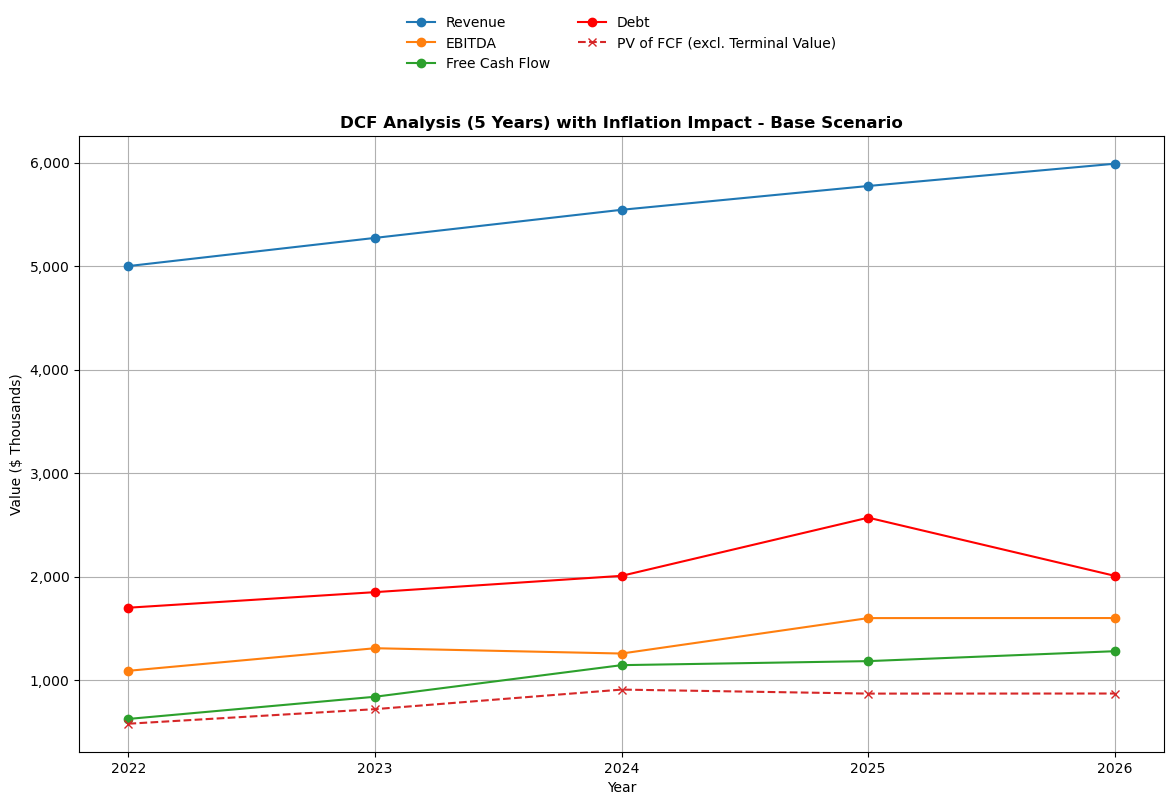

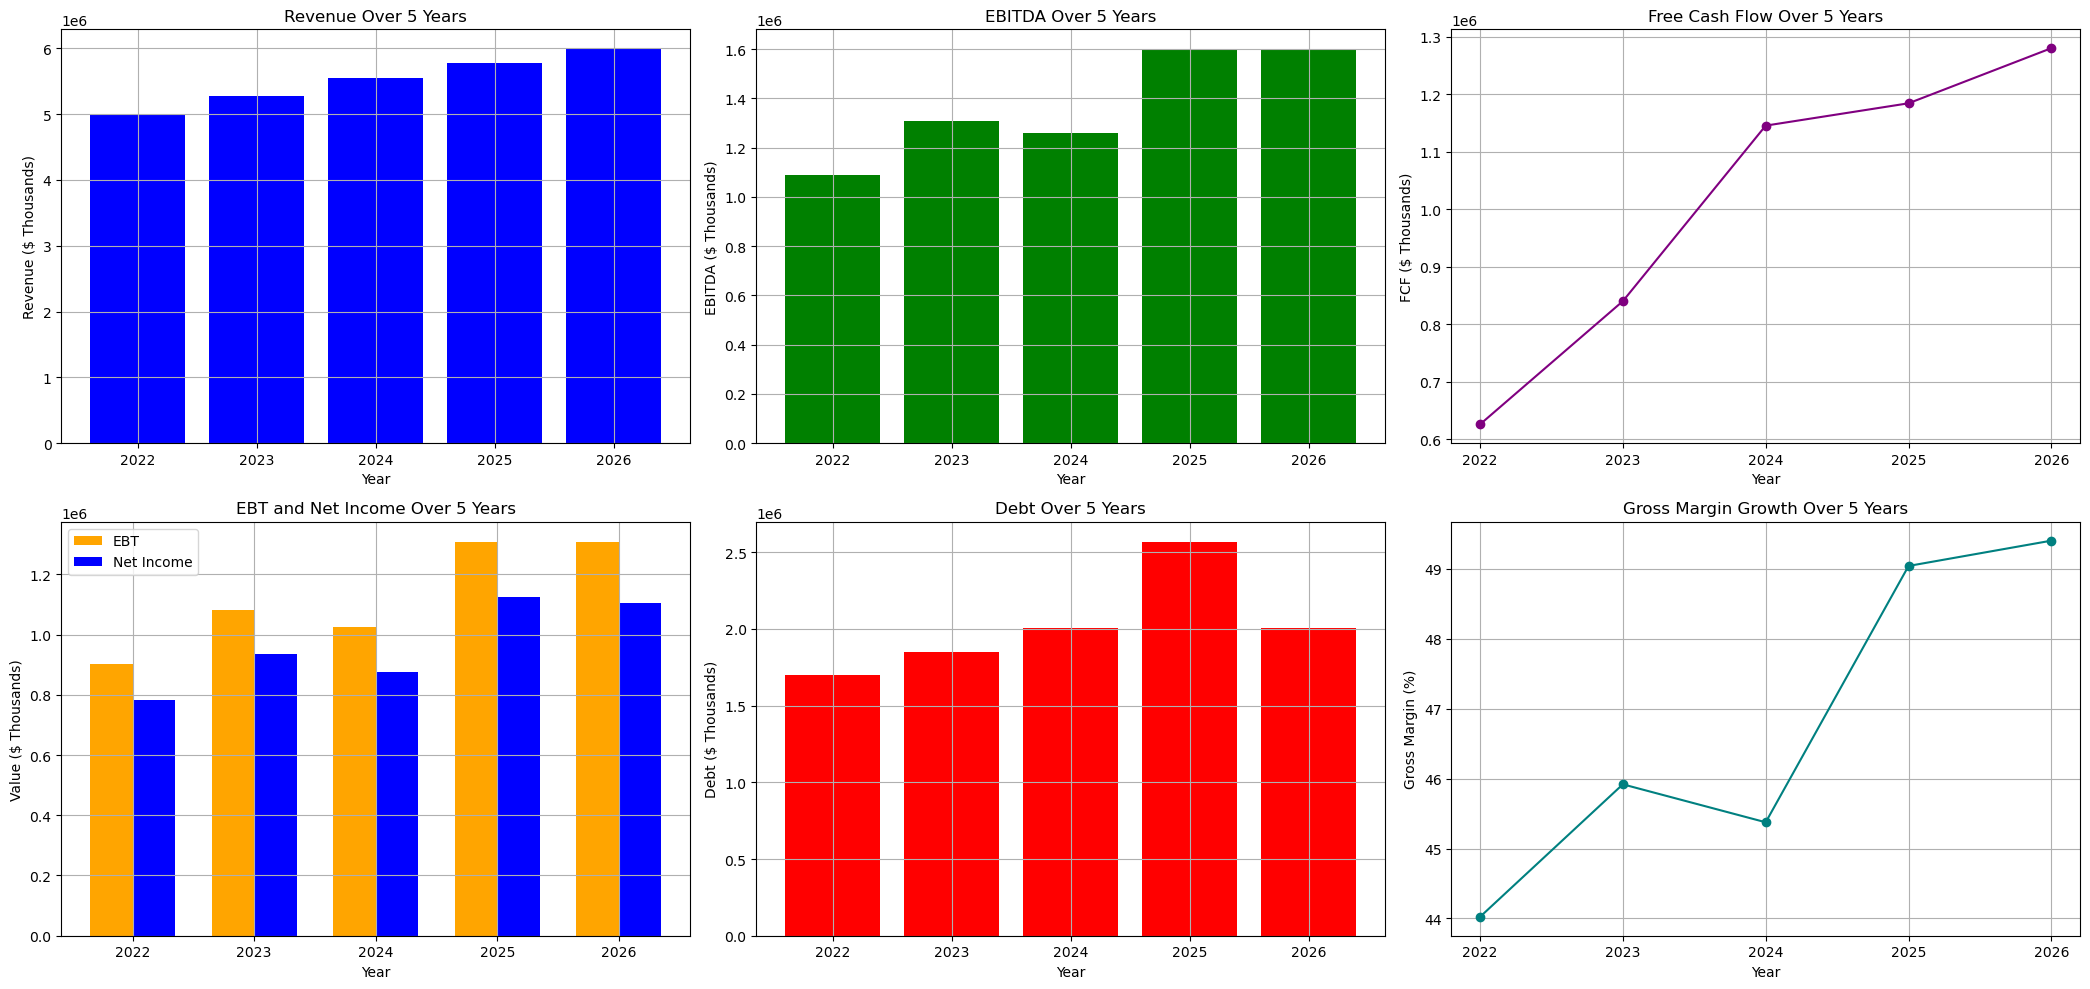

Analysis has been saved to 'DCF_Analysis.xlsx'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Scenario Definitions with different growth rate ranges
scenarios = {
    'Best': {'growth_rate': np.random.uniform(0.07, 0.10, size=5), 'inflation_rate': np.random.uniform(0.02, 0.03, size=5)},  # High growth and low inflation
    'Base': {'growth_rate': np.random.uniform(0.03, 0.07, size=5), 'inflation_rate': np.random.uniform(0.03, 0.04, size=5)},  # Moderate growth and moderate inflation
    'Worst': {'growth_rate': np.random.uniform(-0.02, 0.03, size=5), 'inflation_rate': np.random.uniform(0.04, 0.07, size=5)}  # Low growth and high inflation
}

# Function to calculate the cost of equity using the Capital Asset Pricing Model (CAPM)
def calculate_cost_of_equity(risk_free_rate, market_return, beta):
    return risk_free_rate + beta * (market_return - risk_free_rate)

# Function to calculate the cost of debt based on interest rate and tax rate
def calculate_cost_of_debt(interest_rate, tax_rate):
    return interest_rate * (1 - tax_rate)

# Adjust the date for February in non-leap years
def adjust_february_date(date):
    if date.month == 2 and date.day == 29:
        return date.replace(day=28)
    return date

# Function to run the analysis based on selected scenario
def run_dcf_analysis(start_year, scenario='Base'):
    growth_rate = scenarios[scenario]['growth_rate']
    inflation_rate = scenarios[scenario]['inflation_rate']
    base_revenue = 5000000  # Starting revenue value (e.g., $5 million)
    tax_rate = np.random.uniform(0.20, 0.23)  # Random tax rate between 20% and 23%
    
    # User inputs
    print("Please enter the following values based on the selected scenario:")
    print(f"Scenario: {scenario}")
    print("Recommended ranges:")
    if scenario == 'Best':
        print("Terminal Growth Rate: 0.03 to 0.05")
        print("Discount Rate: 0.07 to 0.08")
        print("Beta: 0.9 to 1.2")
    elif scenario == 'Base':
        print("Terminal Growth Rate: 0.02 to 0.03")
        print("Discount Rate: 0.08 to 0.09")
        print("Beta: 1.0 to 1.3")
    elif scenario == 'Worst':
        print("Terminal Growth Rate: 0.01 to 0.02")
        print("Discount Rate: 0.09 to 0.10")
        print("Beta: 1.1 to 1.5")

    beta = float(input("Enter the Beta coefficient: ").strip())
    discount_rate = float(input("Enter the discount rate: ").strip())
    terminal_growth_rate = float(input("Enter the terminal growth rate: ").strip())
    interest_rate = np.random.uniform(0.04, 0.06, size=5)  # Variable interest rate between 4% and 6%
    stock_number = 1000000  # Number of stocks (e.g., 1 million shares)

    # Calculating cost of equity and cost of debt
    cost_of_equity = calculate_cost_of_equity(0.03, 0.08, beta)  # Assuming 3% risk-free rate and 8% market return
    cost_of_debt = calculate_cost_of_debt(interest_rate.mean(), tax_rate)  # Adjusted for tax rate

    # WACC Calculation
    equity_value_start = 5000000  # Starting equity value (e.g., $5 million)
    total_debt = np.abs(np.random.randint(1000000, 3000000, size=5)).sum()  # Estimate for WACC calculation
    total_value = equity_value_start + total_debt  # Total value of equity and debt
    wacc = (cost_of_equity * (equity_value_start / total_value)) + (cost_of_debt * (total_debt / total_value))

    # Generate the years as actual dates
    years = []
    for i in range(5):
        new_year_date = start_year.replace(year=start_year.year + i)
        new_year_date = adjust_february_date(new_year_date)
        years.append(new_year_date)
    
    terminal_year = adjust_february_date(start_year.replace(year=start_year.year + 5))  # 5 years plus an additional year

    # New variables for tax depreciation and others
    first_year_tax_depreciation = 0.50
    blended_tax_depreciation_rate = 0.15
    tax_basis_ppe = np.random.uniform(100000, 200000)  # Random initial tax basis for PP&E
    capex = np.abs(np.linspace(500000, 800000, num=5))  # CapEx between $500K and $800K
    tax_losses = np.random.uniform(100000, 250000, size=5)  # Random tax losses

    # Generate revenue with inflation impact, ensuring positive numbers with slight fluctuations
    revenues = [base_revenue]
    for i in range(1, len(years)):
        growth = growth_rate[i]
        revenues.append(revenues[-1] * (1 + growth))
    revenues = np.abs(revenues)  # Ensure revenues are positive

    # Generate expenses, cost of sales, and working capital components
    cost_of_sales = np.abs(np.array(revenues) * np.random.uniform(0.50, 0.60, size=5))  # Cost of sales as 50%-60% of revenue
    expenses_base = np.abs(np.array(revenues) * np.random.uniform(0.20, 0.30, size=5))  # Operating expenses as 20%-30% of revenue
    expenses = expenses_base * (1 + inflation_rate)  # Adjust expenses with inflation rate
    depreciation = np.abs(np.linspace(100000, 200000, num=5))  # Depreciation between $100K and $200K
    working_capital = np.abs(np.linspace(1000000, 2000000, num=5))  # Base working capital
    working_capital_change = np.random.uniform(-0.1, 0.1, size=5)  # Random changes between -10% and 10% year over year
    working_capital = working_capital * (1 + working_capital_change)  # Apply changes to working capital

    # Tax Depreciation calculation
    tax_depreciation = (tax_basis_ppe + capex) * first_year_tax_depreciation * blended_tax_depreciation_rate
    
    # Calculate Gross Profit and Gross Margin
    gross_profit = revenues - cost_of_sales
    gross_margin = (gross_profit / revenues) * 100

    # Calculate EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)
    ebitda_variation = np.random.uniform(-0.05, 0.05, size=5)  # Variation in EBITDA growth
    ebitda = (gross_profit - expenses + depreciation) * (1 + ebitda_variation)  # EBITDA varies each year
    ebitda = np.abs(ebitda)  # Ensure EBITDA is positive

    # Calculate EBIT (Earnings Before Interest and Taxes)
    ebit = ebitda - depreciation  # Subtract depreciation from EBITDA to get EBIT

    # Generate debt and interest expenses
    debt = np.abs(np.random.randint(1000000, 3000000, size=5))  # Generate initial debt values
    interest_expenses = interest_rate * debt  # Interest expenses based on debt

    # Adjusted EBIT and Taxable Income (Unlevered)
    adjusted_ebit = ebit - tax_depreciation  # Adjusted EBIT after tax depreciation
    taxable_income_unlevered = np.maximum(adjusted_ebit, 0)  # Taxable income (unlevered)
    current_tax_unlevered = taxable_income_unlevered * tax_rate  # Current tax (unlevered)

    # Calculate EBT (Earnings Before Tax)
    ebt = ebit - interest_expenses  # Subtract interest expenses from EBIT to get EBT

    # Adjusted EBT and Taxable Income (Levered)
    adjusted_ebt = ebt - tax_depreciation  # Adjusted EBT after tax depreciation
    taxable_income_levered = np.maximum(adjusted_ebt, 0)
    # Calculate the levered current tax
    current_tax_levered = taxable_income_levered * tax_rate  # Current tax (levered)

    # Calculate Tax and Net Income
    tax = ebit * tax_rate  # Tax calculation based on EBIT
    net_income = ebit - tax  # Net income after tax

    # Calculate Free Cash Flow (FCF) without terminal value
    fcf = ebitda - capex - working_capital - current_tax_unlevered  # FCF adjusted for capex, working capital, and unlevered tax
    fcf = np.abs(fcf)  # Ensure FCF is positive

    # Terminal Year calculations
    terminal_revenue = revenues[-1] * (1 + growth_rate[-1])
    terminal_cost_of_sales = cost_of_sales[-1] * (1 + growth_rate[-1])
    terminal_expenses = expenses[-1] * (1 + inflation_rate[-1])
    terminal_working_capital = working_capital[-1] * (1 + working_capital_change[-1])
    terminal_interest_expenses = interest_expenses[-1] * (1 + inflation_rate[-1])
    terminal_ebitda = terminal_revenue - terminal_cost_of_sales - terminal_expenses + depreciation[-1]
    terminal_ebit = terminal_ebitda - depreciation[-1]
    terminal_net_income = terminal_ebit - (terminal_ebit * tax_rate)
    
    # Calculate the discount factor for each year
    discount_factors = [(1 / (1 + discount_rate)**(i+1)) for i in range(len(years))]

    # Calculate the present value of FCF for each year
    present_value_fcf = [fcf[i] * discount_factors[i] for i in range(len(fcf))]

    # Calculate the terminal value based on the terminal year's EBITDA divided by (WACC - terminal growth rate)
    terminal_value = (terminal_ebitda) / (wacc - terminal_growth_rate)
    present_value_terminal = terminal_value * discount_factors[-1]

    # Calculate the total Enterprise Value (Sum of PV of FCF + Terminal Value)
    enterprise_value = np.abs(sum(present_value_fcf) + present_value_terminal)  # Ensure Enterprise Value is positive

    # Adjust total debt to ensure it doesn't exceed a percentage of the enterprise value
    debt_cap = 0.5 * enterprise_value  # Cap total debt at 50% of the enterprise value
    if np.sum(debt) > debt_cap:
        debt = debt * (debt_cap / np.sum(debt))  # Scale down the debt proportionally

    total_debt = np.sum(debt)  # Calculate total debt after adjustment
    equity_value = np.abs(enterprise_value - total_debt)  # Ensure Equity Value is positive

    # Calculate EPS (Earnings Per Share)
    eps = equity_value / stock_number

    # ROS (Return on Sales) Calculation for each year
    ros = (ebt / revenues) * 100  # ROS as a percentage for each year

    # Debt to Equity Ratio Calculation for each year
    debt_to_equity = total_debt / equity_value

    # Create the first DataFrame for the main financial metrics
    df_summary = pd.DataFrame({
        'Year': [year.strftime('%m/%d/%Y') for year in years] + [terminal_year.strftime('%m/%d/%Y')],
        'Revenue': [f"{revenues[i]:,.1f}" for i in range(len(revenues))] + [f"{terminal_revenue:,.1f}"],
        'Gross Profit': [f"{gross_profit[i]:,.1f}" for i in range(len(gross_profit))] + [f"{terminal_revenue - terminal_cost_of_sales:,.1f}"],
        'Gross Margin (%)': [f"{gross_margin[i]:,.1f}" for i in range(len(gross_margin))] + [f"{(terminal_revenue - terminal_cost_of_sales) / terminal_revenue * 100:.1f}"],
        'EBITDA': [f"{ebitda[i]:,.1f}" for i in range(len(ebitda))] + [f"{terminal_ebitda:,.1f}"],
        'EBIT': [f"{ebit[i]:,.1f}" for i in range(len(ebit))] + [f"{terminal_ebit:,.1f}"],
        'Interest Expenses': [f"{interest_expenses[i]:,.1f}" for i in range(len(interest_expenses))] + [f"{terminal_interest_expenses:,.1f}"],
        'EBT': [f"{ebt[i]:,.1f}" for i in range(len(ebt))] + [f"{terminal_ebit - terminal_interest_expenses:,.1f}"],
        'Net Income': [f"{net_income[i]:,.1f}" for i in range(len(net_income))] + [f"{terminal_net_income:,.1f}"],
        'Debt': [f"{debt[i]:,.1f}" for i in range(len(debt))] + [f"{total_debt:,.1f}"],
        'Working Capital': [f"{working_capital[i]:,.1f}" for i in range(len(working_capital))] + [f"{terminal_working_capital:,.1f}"],
    })

    # Create a second DataFrame for FCF and moved columns
    df_fcf = pd.DataFrame({
        'Year': [year.strftime('%m/%d/%Y') for year in years] + [terminal_year.strftime('%m/%d/%Y')],
        'Free Cash Flow': [f"{fcf[i]:,.1f}" for i in range(len(fcf))] + [''],
        'Present Value of FCF': [f"{present_value_fcf[i]:,.1f}" for i in range(len(present_value_fcf))] + [''],
        'Terminal Value': [''] * len(years) + [f"{present_value_terminal:,.1f}"],
        'Enterprise Value': [''] * len(years) + [f"{enterprise_value:,.1f}"],
        'Equity Value': [''] * len(years) + [f"{equity_value:,.1f}"]
    })

    # Add totals to the df_fcf DataFrame
    df_fcf = pd.concat([df_fcf, pd.DataFrame({
        'Year': ['Total'],
        'Free Cash Flow': [f"{sum(fcf):,.1f}"],
        'Present Value of FCF': [f"{sum(present_value_fcf):,.1f}"],
        'Terminal Value': [f"{present_value_terminal:,.1f}"],
        'Enterprise Value': [f"{enterprise_value:,.1f}"],
        'Equity Value': [f"{equity_value:,.1f}"]
    })], ignore_index=True)

    # Print the DCF Analysis Summary
    print("\n" + "="*100)
    print(f" Summary of DCF Analysis ({scenario} Scenario) ".center(100, " "))
    print("="*100)
    print(f"Terminal Growth Rate: {terminal_growth_rate:.1%}")
    print(f"WACC: {wacc:.1%}")
    print(f"Discount Rate: {discount_rate:.1%}")
    print(f"Beta: {beta:.2f}")
    print(f"Stock Number: {stock_number:,}")
    print(f"Inflation Rate (Average): {np.mean(inflation_rate) * 100:.1f}%")
    print(f"Total Working Capital (Final Year): ${working_capital[-1]:,.1f}")
    print(f"Current Tax (Unlevered): ${sum(current_tax_unlevered):,.1f}")
    print(f"Current Tax (Levered): ${sum(current_tax_levered):,.1f}")
    print(f"EPS (Earnings Per Share): ${eps:,.2f}")
    print("-" * 100)

    # Print ROS for each year
    print("Return on Sales (ROS) for each year:")
    for i, year in enumerate(years):
        print(f"Year {year.strftime('%m/%d/%Y')}: {ros[i]:.2f}%")

    print("-" * 100)

    # Display the first summary DataFrame
    print("Detailed Financial Summary:")
    print(df_summary.to_string(index=False, col_space=20, justify='center', header=True))
    
    # Display the FCF DataFrame
    print("\n" + "="*100)
    print(" Free Cash Flow (FCF) and Valuation Analysis ".center(100, " "))
    print("="*100)
    print(df_fcf.to_string(index=False, col_space=20, justify='center', header=True))

    # KPI's Analysis Section
    kpi_df = pd.DataFrame({
        'Year': [year.strftime('%m/%d/%Y') for year in years],
        'Gross Margin (%)': gross_margin,
        'EBT Margin (%)': ros,
        'ROE (%)': (net_income / equity_value) * 100,
        'ROA (%)': (net_income / enterprise_value) * 100,
        'Return on Invested Capital (%)': ((net_income + interest_expenses) / (equity_value + total_debt)) * 100,
        'Effective Interest Rate (%)': interest_rate.mean() * 100,
        'Effective Tax Rate (%)': (tax / ebt) * 100,
        'Debt to Equity Ratio': debt_to_equity,
        'Debt to EBITDA Ratio': total_debt / ebitda,
        'Current Ratio': working_capital / total_debt,
        'EBITDA / Interest Expense': ebitda / interest_expenses
    })

    # Round KPI DataFrame values to 1 decimal place and reduce column spacing
    kpi_df = kpi_df.round(1)

    # Add separators for clarity
    kpi_df.insert(0, ' ', ['-' * 10] * len(years))

    # Display KPI Analysis
    print("\n" + "="*100)
    print(" KPI's Analysis ".center(100, " "))
    print("="*100)
    print(kpi_df.to_string(index=False, col_space=5, justify='center', header=True))

    # Visualization and Analysis (excluding Terminal Value)
    print("\n" + "="*100)
    print(" Visualizations of Financial Metrics ".center(100, " "))
    print("="*100)
    
    plt.figure(figsize=(14, 8))

    # Plot Revenue, EBITDA, FCF, and Debt over time
    plt.plot([year.strftime('%Y') for year in years], revenues, marker='o', linestyle='-', label='Revenue')
    plt.plot([year.strftime('%Y') for year in years], ebitda, marker='o', linestyle='-', label='EBITDA')
    plt.plot([year.strftime('%Y') for year in years], fcf, marker='o', linestyle='-', label='Free Cash Flow')
    plt.plot([year.strftime('%Y') for year in years], debt, marker='o', linestyle='-', label='Debt', color='red')

    # Highlight the Present Value of FCF (excluding Terminal Value)
    plt.plot([year.strftime('%Y') for year in years], present_value_fcf, marker='x', linestyle='--', label='PV of FCF (excl. Terminal Value)')

    # Set the legend on top of the plot
    plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=2, frameon=False)

    plt.xlabel('Year')
    plt.ylabel('Value ($ Thousands)')
    plt.title(f'DCF Analysis (5 Years) with Inflation Impact - {scenario} Scenario', fontweight='bold')
    plt.grid(True)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000))))
    plt.show()

    # Additional Plots/Barcharts for Management Review
    fig, axs = plt.subplots(2, 3, figsize=(21, 10))

    # Bar chart for Revenues
    axs[0, 0].bar([year.strftime('%Y') for year in years], revenues, color='blue')
    axs[0, 0].set_title('Revenue Over 5 Years')
    axs[0, 0].set_xlabel('Year')
    axs[0, 0].set_ylabel('Revenue ($ Thousands)')
    axs[0, 0].grid(True)

    # Bar chart for EBITDA
    axs[0, 1].bar([year.strftime('%Y') for year in years], ebitda, color='green')
    axs[0, 1].set_title('EBITDA Over 5 Years')
    axs[0, 1].set_xlabel('Year')
    axs[0, 1].set_ylabel('EBITDA ($ Thousands)')
    axs[0, 1].grid(True)

    # Line plot for Free Cash Flow
    axs[0, 2].plot([year.strftime('%Y') for year in years], fcf, marker='o', color='purple', linestyle='-', label='Free Cash Flow')
    axs[0, 2].set_title('Free Cash Flow Over 5 Years')
    axs[0, 2].set_xlabel('Year')
    axs[0, 2].set_ylabel('FCF ($ Thousands)')
    axs[0, 2].grid(True)

    # Bar chart for EBT and Net Income
    width = 0.35  # Bar width
    x = np.arange(len(years))

    axs[1, 0].bar(x - width/2, ebt, width, label='EBT', color='orange')
    axs[1, 0].bar(x + width/2, net_income, width, label='Net Income', color='blue')
    axs[1, 0].set_title('EBT and Net Income Over 5 Years')
    axs[1, 0].set_xlabel('Year')
    axs[1, 0].set_ylabel('Value ($ Thousands)')
    axs[1, 0].set_xticks(x)
    axs[1, 0].set_xticklabels([year.strftime('%Y') for year in years])
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Bar chart for Debt
    axs[1, 1].bar([year.strftime('%Y') for year in years], debt, color='red')
    axs[1, 1].set_title('Debt Over 5 Years')
    axs[1, 1].set_xlabel('Year')
    axs[1, 1].set_ylabel('Debt ($ Thousands)')
    axs[1, 1].grid(True)

    # Line plot for Gross Margin Growth
    axs[1, 2].plot([year.strftime('%Y') for year in years], gross_margin, marker='o', color='teal', linestyle='-', label='Gross Margin Growth')
    axs[1, 2].set_title('Gross Margin Growth Over 5 Years')
    axs[1, 2].set_xlabel('Year')
    axs[1, 2].set_ylabel('Gross Margin (%)')
    axs[1, 2].grid(True)

    plt.tight_layout()
    plt.show()

    # Save results to Excel
    with pd.ExcelWriter('DCF_Analysis.xlsx') as writer:
        df_summary.to_excel(writer, sheet_name='Financial Summary', index=False)
        df_fcf.to_excel(writer, sheet_name='FCF and Valuation', index=False)
        kpi_df.to_excel(writer, sheet_name='KPI Analysis', index=False)

    print("Analysis has been saved to 'DCF_Analysis.xlsx'")

# Prompt user for scenario and start date input
scenario_choice = input("Choose the scenario (Best, Base, Worst): ").strip().capitalize()
start_date_str = input("Enter the start date (mm/dd/yyyy): ").strip()

# Parse the start date
start_year = datetime.strptime(start_date_str, "%m/%d/%Y")

# Run the DCF analysis based on user input
run_dcf_analysis(start_year=start_year, scenario=scenario_choice)
